In [ ]:
# import dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

file_path = "dataset/annotations/list.txt"
df = pd.read_csv(file_path, comment="#", sep=" ", header=None, names=["Image", "Class_ID", "Species", "Breed_ID"])

file_test_path = "dataset/annotations/test.txt"
df_test = pd.read_csv(file_test_path, comment="#", sep=" ", header=None, names=["Image", "Class_ID", "Species", "Breed_ID"])

images_dir = "dataset/images"
annotations_dir = "dataset/annotations/xmls"

In [4]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def parse_voc_annotation(xml_file):
    
    tree = ET.parse(xml_file)
    root = tree.getroot()

    objects = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        objects.append({'name': name, 'bbox': (xmin, ymin, xmax, ymax)})

    return objects


def load_voc_dataset(images_dir, annotations_dir):
    dataset = []
    for filename in os.listdir(annotations_dir):
        if filename.endswith(".xml"):
            image_file = os.path.join(images_dir, filename.replace(".xml", ".jpg"))
            annotation_file = os.path.join(annotations_dir, filename)
            
            image_name = filename.replace(".xml", "")
            image_data = df.loc[df["Image"] == image_name]

            if os.path.exists(image_file):    
                annotations = parse_voc_annotation(annotation_file)
                
                if not image_data.empty:
                    species_id = int(image_data["Species"].values[0])
                    breed_id = int(image_data["Breed_ID"].values[0])
                    
                    dataset.append({'image': image_file,
                                    'name': image_name,
                                    'animal': {1: "Cat", 2: "Dog"}.get(species_id),
                                    'breed': breed_id, # breeds.get(breed_id),
                                    'annotations': annotations
                                   })
                else:
                    dataset.append({'image': image_file,
                                    'name': image_name,
                                    'animal': 0,
                                    'breed': 0,
                                    'annotations': annotations
                                   })

    return dataset

#work with dataset for test
def load_voc_dataset_test(images_dir, annotations_file):
    df = pd.read_csv(annotations_file, comment="#", sep=" ", header=None, 
                     names=["Image", "Class_ID", "Species", "Breed_ID"])
    
    test_images = set(df_test["Image"].tolist())
    
    dataset = []
    
    for image_name in test_images:
        image_file = os.path.join(images_dir, image_name + ".jpg")
            
        image_data = df[df["Image"] == image_name]
            
        if not image_data.empty:
            species_id = int(image_data["Species"].values[0])
            breed_id = int(image_data["Breed_ID"].values[0])
                
            dataset.append({
                'image': image_file,
                'name': image_name,
                'animal': {1: "Cat", 2: "Dog"}.get(species_id),
                'breed': breed_id, # breeds.get(breed_id, "Unknown Breed"),
                'annotations': []  # No XML, so annotations are empty
            })
        else:
            dataset.append({
                'image': image_file,
                'name': image_name,
                'animal': 0,
                'breed': 0,
                'annotations': []  # No XML, so annotations are empty
            })
    
    return dataset

In [ ]:
# dataset analysis

In [12]:
dataset = load_voc_dataset(images_dir, annotations_dir)

dataset_test = load_voc_dataset_test(images_dir, file_test_path)
dataset_train = dataset

df_dataset = pd.DataFrame(dataset)

In [13]:
print(f"Size of data: {df.shape}")
print("\nData type:\n", df.dtypes)


Size of data: (7349, 4)

Data type:
 Image       object
Class_ID     int64
Species      int64
Breed_ID     int64
dtype: object


/tmp/ipykernel_101831/38532024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_dataset["animal"], palette="viridis")


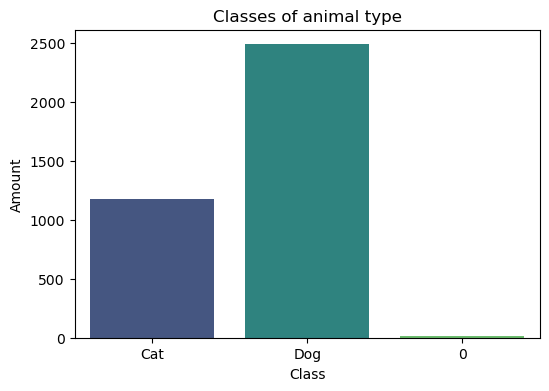

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_dataset["animal"], palette="viridis")
plt.title("Classes of animal type")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()


/tmp/ipykernel_101831/2165098154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_dataset["breed"], palette="viridis")


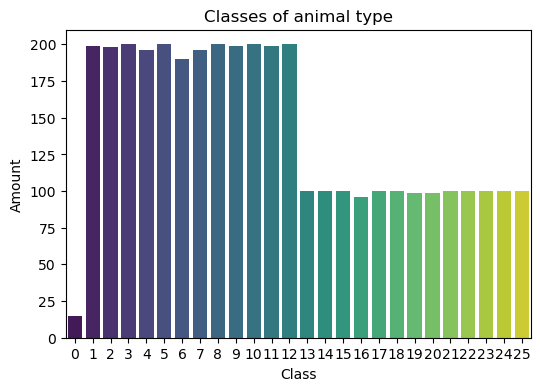

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_dataset["breed"], palette="viridis")
plt.title("Classes of animal type")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()


In [20]:
from code.breeds_list import breeds

/tmp/ipykernel_101831/2843821818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_dataset["breed"], palette="viridis")


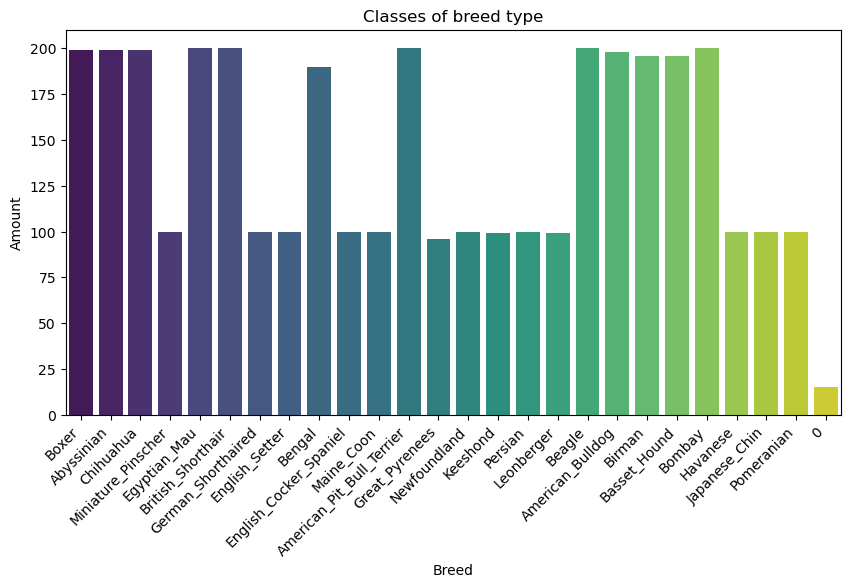

In [21]:
df_dataset["breed"] = df_dataset["breed"].replace(breeds)

plt.figure(figsize=(10, 5))
sns.countplot(x=df_dataset["breed"], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Classes of breed type")
plt.xlabel("Breed")
plt.ylabel("Amount")
plt.show()
